In [36]:
import pandas as pd
import plotly.express as px

In [37]:
# Cargar los DataFrames desde los archivos CSV
df_cali_hotels = pd.read_csv('california_hotels.csv')
df_cali_attributes = pd.read_csv('california_hotels_attributes.csv')

# Unificar horizontalmente usando pd.concat
df_combined = pd.concat([df_cali_hotels, df_cali_attributes], axis=1)

In [38]:
df_combined = df_combined.drop('Unnamed: 0', axis=1)

In [39]:
import pandas as pd
import json

# Reemplazar comillas simples por comillas dobles
df_combined['Scores'] = df_combined['Scores'].str.replace("'", "\"")

# Convertir las cadenas JSON a listas de diccionarios
df_combined['Scores'] = df_combined['Scores'].apply(lambda x: json.loads(x) if pd.notna(x) else [])

# Crear columnas para cada clave del diccionario
df_scores_expanded = pd.json_normalize(df_combined['Scores'])

# Concatenar las columnas de puntajes expandidas al DataFrame original
df_combined = pd.concat([df_combined, df_scores_expanded], axis=1)

In [40]:
# Convertir las últimas 8 columnas a cadenas
df_combined[df_combined.columns[-8:]] = df_combined[df_combined.columns[-8:]].astype(str)

In [41]:
# Eliminar las llaves y comillas simples de las últimas 8 columnas
for col in df_combined.columns[-8:]:
    df_combined[col] = df_combined[col].apply(lambda x: x.replace("{", "").replace("}", "").replace("'", "") if pd.notna(x) else None)


In [42]:
import pandas as pd

# Definimos una función para obtener el título de una celda
def get_title(cell_value):
    if pd.notna(cell_value):
        return cell_value.split(':')[0]
    else:
        return None

# Iteramos sobre las últimas 8 columnas y asignamos nuevos nombres
for col in df_combined.columns[-8:]:
    # Usamos apply para obtener el título de cada celda
    new_titles = df_combined[col].apply(get_title)
    
    # Asignamos los nuevos nombres a las columnas
    df_combined = df_combined.rename(columns=dict(zip([col]*len(new_titles), new_titles)))

# Ahora, df_combined tiene las columnas renombradas según los valores presentes en ellas



In [43]:
# Obtén el nombre de la anteúltima columna
anteultimate_col_index = -2
anteultimate_col_name = df_combined.columns[anteultimate_col_index]

# Copia el nombre de las columnas
new_columns = list(df_combined.columns)

# Cambia el nombre de la anteúltima columna a 'WiFi Gratis'
new_columns[anteultimate_col_index] = 'WiFi Gratis'

# Actualiza los nombres de las columnas en el DataFrame
df_combined.columns = new_columns


In [44]:
import pandas as pd

# Selecciona solo las últimas 8 columnas
last_8_columns = df_combined.iloc[:, -8:]

# Aplica una función para extraer y convertir los valores numéricos después de los dos puntos (:) en cada celda
numeric_values_only = last_8_columns.applymap(lambda x: pd.to_numeric(x.split(':')[-1], errors='coerce') if isinstance(x, str) and ':' in x else x)

# Actualiza las últimas 8 columnas en el DataFrame original con los valores numéricos
df_combined.iloc[:, -8:] = numeric_values_only


# Nuevo df

In [76]:
# Cargar los DataFrames desde los archivos CSV
california_hotels = pd.read_csv('..\\files\\data\\booking\\california_hotels.csv')
usa_clients = pd.read_csv('..\\files\\data\\usa_clients.csv')

In [77]:
df_california_hotels = pd.DataFrame(california_hotels)
df_usa_clients = pd.DataFrame(usa_clients)

In [80]:
df_california_hotels.head()

,state,city,name,avg_score,price,stars,reviews_url,attributes,latitude,longitude,Personal,Instalaciones y servicios,Limpieza,Confort,Relación calidad-precio,Ubicación,WiFi Gratis
0,California,Los Angeles,W Hollywood,73.0,849.752,4.0,https://www.booking.com/hotel/us/w-hollywood.e...,"['Habitaciones sin humo', '4 restaurantes', 'W...",34.100794,-118.325906,9.4,8.5,9.0,9.0,8.5,9.2,9.1
1,California,Los Angeles,Park Plaza Lodge,86.0,466.927,3.0,https://www.booking.com/hotel/us/park-plaza-lo...,"['Restaurante', 'Parking gratis', 'Tetera/cafe...",34.070129,-118.351360,8.7,8.2,8.5,8.6,7.2,8.6,8.5
2,California,Los Angeles,Moxy Downtown Los Angeles,79.0,904.364,4.0,https://www.booking.com/hotel/us/moxy-downtown...,"['WiFi gratis', 'Desayuno', 'Terraza', 'Parkin...",34.041151,-118.267341,9.0,9.0,9.1,9.0,8.8,9.0,9.2
3,California,Los Angeles,Hollywood Homes minutes to everything SPACIOUS...,88.0,463.104,4.0,https://www.booking.com/hotel/us/hollywood-cos...,"['Habitaciones familiares', 'Aire acondicionad...",34.086662,-118.314868,8.1,7.2,7.7,7.7,7.0,8.4,8.3
4,California,Los Angeles,Best Western Hollywood Plaza Inn Hotel - Holly...,72.0,390.267,3.0,https://www.booking.com/hotel/us/best-western-...,"['Habitaciones sin humo', 'Restaurante', 'Adap...",34.107181,-118.337637,8.3,8.4,8.7,8.8,7.6,8.5,8.6


In [79]:
df_california_hotels = df_california_hotels.drop('Unnamed: 0', axis=1)

In [81]:
df_usa_clients.head()

,Unnamed: 0,state,city,name,avg_score,price,reviews_url,stars,hotel_id
0,4182,California,Mission Viejo,Hyatt House Irvine/John Wayne Airport,88.0,363.318,https://www.booking.com/hotel/us/hyatt-house-i...,3.0,11042
1,3398,California,San Francisco,Hyatt Regency San Francisco,87.0,806.063,https://www.booking.com/hotel/us/hyatt-regency...,4.0,12695
2,4006,California,San Jose,Hyatt Place San Jose Pinares,87.0,262.134,https://www.booking.com/hotel/cr/hyatt-place-s...,3.0,13042
3,3564,California,San Diego,Manchester Grand Hyatt San Diego,86.0,620.385,https://www.booking.com/hotel/us/manchester-gr...,4.0,13769
4,3500,California,San Francisco,Hyatt Regency San Francisco Downtown SOMA,86.0,1020.140,https://www.booking.com/hotel/us/hyatt-regency...,4.0,13779


In [94]:
import plotly.express as px

# Seleccionar las columnas relevantes para el gráfico de barras
score_columns = [
    'Personal', 'Instalaciones y servicios', 'Limpieza', 'Confort',
    'Relación calidad-precio', 'Ubicación', 'WiFi Gratis'
]

# Filtrar el DataFrame para el hotel específico
hotel_name = 'Hyatt Regency San Francisco'
hotel_data = df_california_hotels[df_california_hotels['name'] == hotel_name][score_columns].transpose()
hotel_data.columns = ['Hotel Score']
hotel_data['Categoria'] = hotel_data.index

# Calcular el promedio de cada columna de score para todos los hoteles en California
state_avg_scores = df_california_hotels[score_columns].mean().reset_index()
state_avg_scores.columns = ['Categoria', 'State Average Score']

# Combinar los datos del hotel y los promedios estatales en un solo DataFrame
combined_data = pd.merge(hotel_data, state_avg_scores, on='Categoria')

# Configuración del gráfico con dos barras por categoría
fig = px.bar(combined_data, x='Categoria', y=['Hotel Score', 'State Average Score'],
             labels={'value': 'Puntuación', 'variable': 'Categoría'},
             title=f'Comparación de Puntuaciones para el Hotel {hotel_name} y Promedios Estatales',
             height=400,
             template='plotly_white',
             barmode='group')  # Utilizar 'group' para agrupar las barras

# Mostrar el gráfico
fig.show()


In [95]:
import plotly.express as px

# Contar la cantidad de hoteles por estrellas
stars_count = df_california_hotels['stars'].value_counts().sort_index().reset_index()
stars_count.columns = ['Estrellas', 'Cantidad']

# Crear el gráfico de barras
fig = px.bar(stars_count, x='Estrellas', y='Cantidad',
             title='Cantidad de Hoteles por Estrellas',
             labels={'Estrellas': 'Cantidad de Estrellas', 'Cantidad': 'Cantidad de Hoteles'},
             template='plotly_white')

# Mostrar el gráfico
fig.show()


In [96]:
import plotly.express as px

# Filtrar los valores no nulos de la columna 'price'
df_prices = df_california_hotels[df_california_hotels['price'].notnull()]

# Crear el histograma
fig = px.histogram(df_prices, x='price',
                   title='Histograma de Precios de Hoteles en California',
                   labels={'price': 'Precio', 'count': 'Cantidad de Hoteles'},
                   template='plotly_white')

# Mostrar el gráfico
fig.show()


In [97]:
import plotly.express as px

# Filtrar los valores no nulos de la columna 'avg_score'
df_avg_scores = df_california_hotels[df_california_hotels['avg_score'].notnull()]

# Crear el histograma
fig = px.histogram(df_avg_scores, x='avg_score',
                   title='Histograma del Avg Score de Hoteles en California',
                   labels={'avg_score': 'Avg Score', 'count': 'Cantidad de Hoteles'},
                   template='plotly_white')

# Mostrar el gráfico
fig.show()


# Atributos

In [99]:
df_california_hotels.head(3)

,state,city,name,avg_score,price,stars,reviews_url,attributes,latitude,longitude,Personal,Instalaciones y servicios,Limpieza,Confort,Relación calidad-precio,Ubicación,WiFi Gratis
0,California,Los Angeles,W Hollywood,73.0,849.752,4.0,https://www.booking.com/hotel/us/w-hollywood.e...,"['Habitaciones sin humo', '4 restaurantes', 'W...",34.100794,-118.325906,9.4,8.5,9.0,9.0,8.5,9.2,9.1
1,California,Los Angeles,Park Plaza Lodge,86.0,466.927,3.0,https://www.booking.com/hotel/us/park-plaza-lo...,"['Restaurante', 'Parking gratis', 'Tetera/cafe...",34.070129,-118.351360,8.7,8.2,8.5,8.6,7.2,8.6,8.5
2,California,Los Angeles,Moxy Downtown Los Angeles,79.0,904.364,4.0,https://www.booking.com/hotel/us/moxy-downtown...,"['WiFi gratis', 'Desayuno', 'Terraza', 'Parkin...",34.041151,-118.267341,9.0,9.0,9.1,9.0,8.8,9.0,9.2


In [100]:
df_california_hotels['attributes']

0       ['Habitaciones sin humo', '4 restaurantes', 'W...
1       ['Restaurante', 'Parking gratis', 'Tetera/cafe...
2       ['WiFi gratis', 'Desayuno', 'Terraza', 'Parkin...
3       ['Habitaciones familiares', 'Aire acondicionad...
4       ['Habitaciones sin humo', 'Restaurante', 'Adap...
                              ...                        
1174    ['Habitaciones sin humo', 'Adaptado personas d...
1175    ['Piscina interior', 'WiFi gratis', '¿Se sirve...
1176    ['WiFi gratis', 'Desayuno', '¿Se sirven desayu...
1177    ['Piscina interior', 'WiFi gratis', 'Desayuno'...
1178    ['WiFi gratis', 'Desayuno', 'Gimnasio', 'Pisci...
Name: attributes, Length: 1179, dtype: object

In [102]:
import ast
from collections import Counter

# Crear una copia del DataFrame para evitar modificar el original
df_copy = df_california_hotels.copy()

# Convertir las cadenas de lista a listas reales, manejar NaN
df_copy['attributes'] = df_copy['attributes'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Obtener una lista plana de todos los atributos
all_attributes = [attribute for sublist in df_copy['attributes'] for attribute in sublist]

# Contar la frecuencia de cada atributo
attribute_counts = Counter(all_attributes)

# Crear un DataFrame con los resultados
df_attribute_counts = pd.DataFrame(list(attribute_counts.items()), columns=['Attribute', 'Count'])

# Ordenar por la frecuencia descendente
df_attribute_counts = df_attribute_counts.sort_values(by='Count', ascending=False)

# Graficar los atributos más comunes
import plotly.express as px

fig = px.bar(df_attribute_counts.head(10), x='Attribute', y='Count',
             title='Atributos Más Comunes en Hoteles de California',
             labels={'Count': 'Cantidad de Hoteles'},
             template='plotly_white')

# Mostrar el gráfico
fig.show()


# Kpis

In [1]:
import pandas as pd

In [8]:
# Cargar los DataFrames desde los archivos CSV
reviews = pd.read_csv('..\\files\\data\\usa_clients_reviews.csv')

In [9]:
df_reviews = pd.DataFrame(reviews)

In [10]:
df_reviews.head()

,Unnamed: 0,nationality,acommodation,stay,company,review,hotel_id,is_american,date,sentiment
0,2,Corea del Sur,Suite Estudio con cocina y sofá cama - Cama ex...,27.0,Persona que viaja sola,what a great honor to stay here.\r\nThank you ...,11042.0,0,2023-11-20,0.525000
1,3,Taiwán,Den Room with King Bed,4.0,Persona que viaja sola,"Everything works and fairly new, I loved the w...",11042.0,0,2023-11-15,0.134091
2,4,Estados Unidos,Suite Estudio con cocina y sofá cama - Cama ex...,4.0,En familia,Weather was ideal\r\nLoved the swimming pool.,11042.0,1,2023-11-14,0.800000
3,5,Estados Unidos,"Suite con 1 dormitorio, cama extragrande, sofá...",6.0,En pareja,"I'm here for a couple weeks....So, a little ti...",11042.0,1,2023-11-08,0.035417
4,6,Estados Unidos,"Suite con 1 dormitorio, cama extragrande, sofá...",1.0,En familia,The property was nice but expensive for one ni...,11042.0,1,2023-10-26,0.060000


In [5]:
df_reviews.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

In [7]:
df_reviews = df_reviews.dropna(subset=['sentiment'])

In [169]:
positive_dates = df_reviews.loc[df_reviews['sentiment'] < 0, 'date']
positive_dates

47     2022-03-25
94     2021-04-14
128    2023-10-04
130    2023-10-03
237    2022-11-20
          ...    
1332   2023-10-17
1338   2021-12-29
1339   2021-11-24
1348   2023-02-20
1387   2022-06-07
Name: date, Length: 198, dtype: datetime64[ns]

### KPI 1

In [159]:
# -	Kpi1: Aumentar el porcentaje de reseñas positivas (PRP) en un 2% cada 3 meses hasta alcanzar 90%.
import plotly.express as px
import pandas as pd

# Filtra solo las reseñas positivas
df_positive_reviews = df_reviews[df_reviews['sentiment'] > 0]

# Agrupa por trimestre y calcula el total de reseñas y el total de reseñas positivas
grouped_data = df_reviews.groupby(pd.Grouper(key='date', freq='3M')).agg(
    total_reviews=('sentiment', 'count'),
    positive_reviews=('sentiment', lambda x: (x > 0).sum())
)

# Calcula el porcentaje de reseñas positivas
grouped_data['PRP'] = (grouped_data['positive_reviews'] / grouped_data['total_reviews']) * 100

# Calcula la proyección del crecimiento del 2% por trimestre hasta alcanzar el 90%
growth_rate = 0.02
target_percentage = 90
quarters_to_target = (target_percentage - grouped_data['PRP'].iloc[-1]) / (growth_rate * 100)
date_range = pd.date_range(start=grouped_data.index[-1], periods=int(quarters_to_target * 4) + 1, freq='M')
projected_data = pd.DataFrame(index=date_range)
projected_data['PRP'] = [min(grouped_data['PRP'].iloc[-1] + (growth_rate * 100 * i), target_percentage) for i in range(1, len(projected_data) + 1)]

# Gráfico interactivo con Plotly
fig = px.line(grouped_data, x=grouped_data.index, y='PRP',
              labels={'PRP': 'Porcentaje de Reseñas Positivas (%)'},
              title='Porcentaje de Reseñas Positivas (PRP) cada 3 meses',
              markers=True)

# Añadir la línea punteada para la proyección
fig.add_scatter(x=projected_data.index, y=projected_data['PRP'], mode='lines', line=dict(dash='dash'),
                name=f'Proyección ({growth_rate*100}% Crecimiento por Trimestre hasta {target_percentage}%)')

# Mostrar el gráfico
fig.show()


### KPI 2

el segundo kpi consiste en Aumentar el índice de satisfacción de huéspedes extranjeros en los próximos 6 meses en un X%. Tambien tengo que calcular esto dividiendo el indice de satisfaccion a extranjeros (donde sentiment > 0 y 'is_american' == 0) sobre el total de reviews de extranjeros. Tambien voy a necesitar una linea punteada que muestre cómo debe ser el próximo índice para los siguientes 6 meses.

In [13]:
# KPI 2: Aumentar el índice de satisfacción de huéspedes de EEUU en los próximos 6 meses en un 7%.

import numpy as np
import pandas as pd
import plotly.express as px

df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews.drop('Unnamed: 0', axis=1, inplace=True)

# Filtrar reseñas positivas para huéspedes estadounidenses
positive_usa_reviews = df_reviews[(df_reviews['sentiment'] > 0) & (df_reviews['nationality'] == 'Estados Unidos')]

# Crear una nueva columna con el cuatrimestre
positive_usa_reviews['quarter'] = positive_usa_reviews['date'].dt.to_period("Q")

# Calcular el porcentaje de reseñas positivas para cada cuatrimestre
percentage_positive_usa_by_quarter = (
    positive_usa_reviews.groupby('quarter').size() / df_reviews[df_reviews['nationality'] == 'Estados Unidos'].groupby('quarter').size()
) * 100

# Crear el DataFrame para la proyección de los próximos 6 meses
projected_data_usa_six_months = pd.DataFrame(index=pd.date_range(start=percentage_positive_usa_by_quarter.index[-1].to_timestamp(), periods=7, freq='M'))

# Definir el objetivo de crecimiento para los próximos 6 meses
growth_rate_usa_six_months = 0.07  # 7% de crecimiento en 6 meses
target_percentage_usa_six_months = round(percentage_positive_usa_by_quarter.iloc[-1] + growth_rate_usa_six_months * 100, 2)

# Calcular la proyección con crecimiento lineal para los próximos 6 meses
projected_data_usa_six_months['Satisfaction Index'] = (
    percentage_positive_usa_by_quarter.iloc[-1] +
    np.arange(1, len(projected_data_usa_six_months) + 1) * growth_rate_usa_six_months * 100
)

# Asegurarse de que la proyección alcance el objetivo al final de los próximos 6 meses
projected_data_usa_six_months['Satisfaction Index'] = np.minimum(
    projected_data_usa_six_months['Satisfaction Index'], target_percentage_usa_six_months
)

# Crear el gráfico interactivo con Plotly
fig_usa_six_months = px.line(
    x=percentage_positive_usa_by_quarter.index.to_timestamp(),
    y=percentage_positive_usa_by_quarter.values,
    labels={'y': 'Porcentaje de Reseñas Positivas', 'x': 'Año'},
    title='Porcentaje de Reseñas Positivas para Huéspedes Estadounidenses por Cuatrimestre con Proyección a 6 Meses'
)

# Añadir la línea punteada roja para el objetivo
fig_usa_six_months.add_scatter(
    x=[projected_data_usa_six_months.index[0], projected_data_usa_six_months.index[-1]],
    y=[percentage_positive_usa_by_quarter.iloc[-1], target_percentage_usa_six_months],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name=f'Proyección (7% Crecimiento por 6 Meses hasta {target_percentage_usa_six_months}%)'
)

# Mostrar el gráfico
fig_usa_six_months.show()


C:\Users\diego\AppData\Local\Temp\ipykernel_4492\1031160208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_usa_reviews['quarter'] = positive_usa_reviews['date'].dt.to_period("Q")


KeyError: 'quarter'

### Kpi3 

In [229]:
# -	Kpi3: Mantener el índice de Respuestas a Reseñas Negativas (IRRN) por encima del 95%. 

import plotly.express as px
import pandas as pd

# Cargar los datos originales (df_reviews)
# ... (código para cargar el DataFrame)

# Filtrar reseñas negativas
negative_reviews = df_reviews[df_reviews['sentiment'] < 0]

# Calcular el 95% de las reseñas negativas
threshold_95 = negative_reviews.shape[0] * 0.95

# Crear el gráfico interactivo con Plotly
fig_reviews = px.bar(
    x=['Total de Reseñas', 'Reseñas Negativas'],
    y=[df_reviews.shape[0], negative_reviews.shape[0]],
    labels={'y': 'Cantidad de Reseñas', 'x': 'Tipo de Reseña'},
    title='Total de Reseñas y Reseñas Negativas',
)

# Añadir línea punteada para el 95% de reseñas negativas
fig_reviews.add_shape(
    type='line',
    x0=-0.5,
    y0=threshold_95,
    x1=1.5,
    y1=threshold_95,
    line=dict(color='red', dash='dash'),
    name='Umbral del 95% para Reseñas Negativas'
)

# Mostrar el gráfico
fig_reviews.show()


### Kpi 4

In [290]:
# -	KPI4: Mantener el promedio mensual de sentimiento para huéspedes que vienen en familia por encima de 0.25.

import pandas as pd
import plotly.express as px

# Supongamos que df_reviews es tu DataFrame
# Puedes cargar los datos así:
# df_reviews = pd.read_csv("tu_archivo.csv")

# Convertir la columna 'date' a tipo datetime (si aún no lo está)
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Filtrar las reseñas para huéspedes que vienen en familia
family_reviews = df_reviews[df_reviews['company'] == 'En familia']

# Establecer la columna 'date' como índice
family_reviews.set_index('date', inplace=True)

# Resample por mes y calcular el promedio de 'sentiment'
average_sentiment_by_month = family_reviews['sentiment'].resample('M').mean()

# Crear el gráfico interactivo con Plotly (tipo de gráfico de línea)
fig = px.line(average_sentiment_by_month, x=average_sentiment_by_month.index, y=average_sentiment_by_month.values,
              labels={'y': 'Promedio de Sentimiento'},
              title='Promedio Mensual de Sentimiento para Reseñas de Familias')

fig.show()


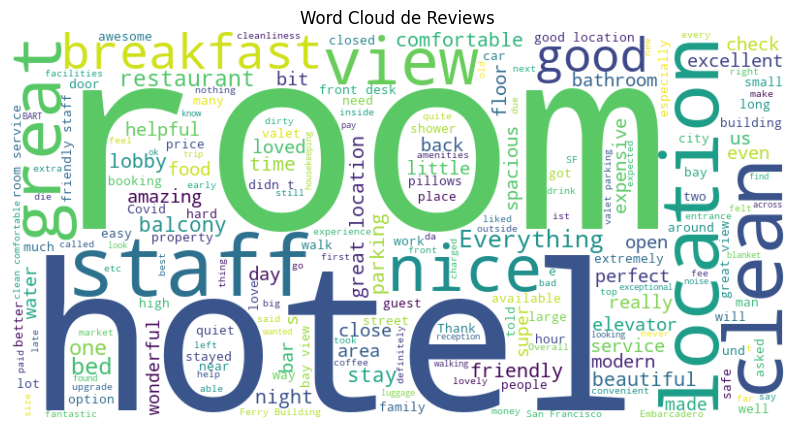

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una copia del DataFrame
df_copy = df_reviews.copy()

# Combinar todos los resúmenes en un solo texto
resumenes_texto = ' '.join(df_copy['review'].dropna())

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(resumenes_texto)

# Mostrar la Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews')
plt.show()

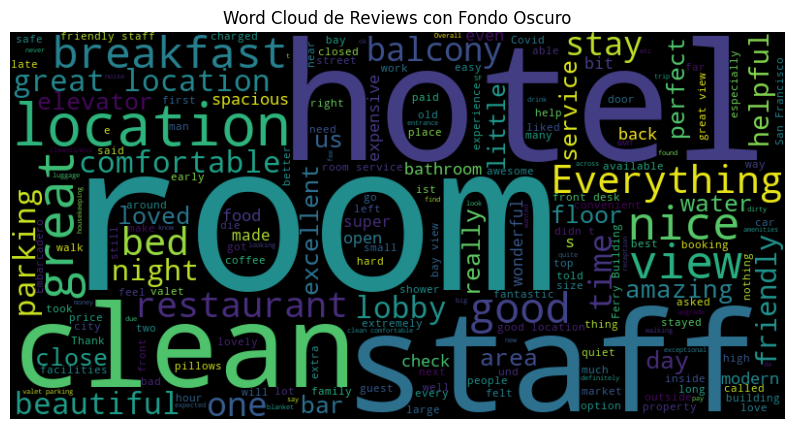

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una copia del DataFrame
df_copy = df_reviews.copy()

# Combinar todos los resúmenes en un solo texto
resumenes_texto = ' '.join(df_copy['review'].dropna())

# Crear un objeto WordCloud con fondo oscuro
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(resumenes_texto)

# Mostrar la Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews con Fondo Oscuro')
plt.show()
